In [7]:
import h5py
import matplotlib.pyplot as plt

In [6]:
dpath = r"F:/little_fish_simulation_logs/generation_0000000/fish_240730_14_29_00.741772.hdf5"
neuron_labels = [
    "eye_terrain_e", 
    "eye_terrain_n", 
    "eye_terrain_w", 
    "eye_terrain_s", 
    "eye_food_e", 
    "eye_food_n", 
    "eye_food_w", 
    "eye_food_s", 
    "hidden_0", 
    "hidden_1", 
    "hidden_2", 
    "hidden_3", 
    "hidden_4", 
    "hidden_5", 
    "hidden_6", 
    "hidden_7", 
    "muscle_e",
    "muscle_n",
    "muscle_w",
    "muscle_s", 
]

color_eye_terrain = "#1f618d"
color_eye_food = "#6c3483"
color_hidden = "#b03a2e"
color_muscle = "#1e8449"

In [3]:
ff = h5py.File(dpath, 'r')

In [5]:
st_grp = ff['simulation_000/simulation_log/action_histories']
assert len(st_grp.keys()) == len(neuron_labels)

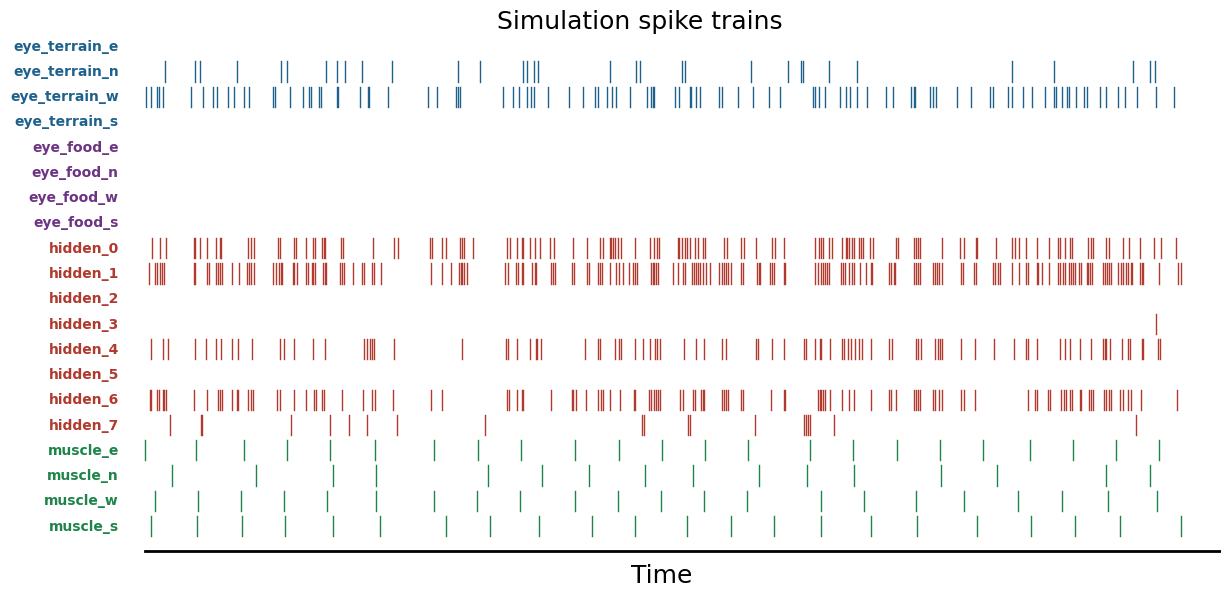

In [27]:
colors = [color_eye_terrain] * 4 + [color_eye_food] * 4 + [color_hidden] * 8 + [color_muscle] * 4

f, ax = plt.subplots(figsize=(15, 7))

for idx, neu_n in enumerate(neuron_labels):
    curr_color = colors[idx]
    curr_st = st_grp[f"neuron_{idx:04d}"][()]
    
    for s in curr_st:
        ax.plot([s, s], [idx-0.4, idx+0.4], ls='-', c=curr_color, lw=1)
    
    ax.text(-30, idx, neu_n, c=curr_color, ha="right", va="center", fontsize=10, weight="semibold")

ax.set_title("Simulation spike trains", fontsize=18)
ax.text(600, 20.5, "Time", fontsize=18, c="k", ha="center", va="top")
ax.plot([0, 1250], [20, 20], "-k", lw=2)
ax.invert_yaxis()
ax.set_xlim(-100, 1250)
ax.set_axis_off()